In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/MPG.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [6]:
df.fillna(method='ffill',inplace=True)

In [7]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [8]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.178392,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.294837,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,92.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


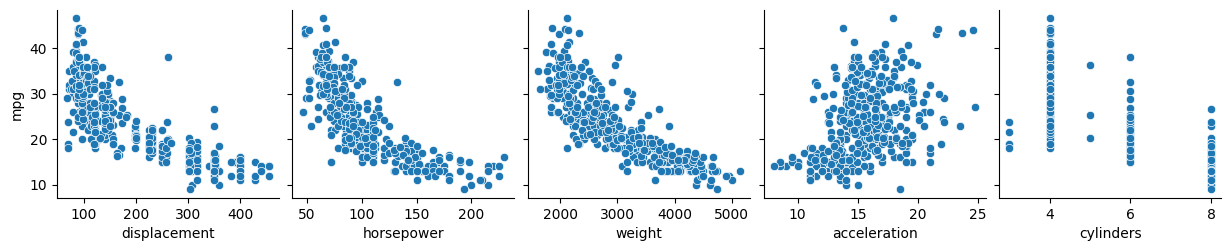

In [9]:
sns.pairplot(df,x_vars=['displacement','horsepower','weight','acceleration','cylinders'],y_vars=['mpg'])

In [10]:
df.corr()

<ipython-input-10-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.777685,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842627,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897192,0.932824,-0.543684,-0.370164
horsepower,-0.777685,0.842627,0.897192,1.000000,0.864040,-0.686334,-0.417302
weight,-0.831741,0.896017,0.932824,0.864040,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.686334,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.417302,-0.306564,0.288137,1.000000


In [11]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [12]:
y=df['mpg']

In [13]:
x=df[['displacement', 'horsepower', 'weight']]

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=2529)

In [15]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
dtr=DecisionTreeRegressor(max_depth=2)
dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)
y_pred

array([14.53235294, 33.86481481, 19.28518519, 19.28518519, 33.86481481,
       26.45409836, 19.28518519, 14.53235294, 14.53235294, 26.45409836,
       26.45409836, 19.28518519, 33.86481481, 14.53235294, 19.28518519,
       14.53235294, 19.28518519, 33.86481481, 14.53235294, 14.53235294,
       14.53235294, 33.86481481, 26.45409836, 14.53235294, 14.53235294,
       19.28518519, 33.86481481, 33.86481481, 14.53235294, 26.45409836,
       14.53235294, 26.45409836, 26.45409836, 19.28518519, 14.53235294,
       19.28518519, 14.53235294, 26.45409836, 33.86481481, 33.86481481,
       26.45409836, 33.86481481, 26.45409836, 26.45409836, 19.28518519,
       26.45409836, 19.28518519, 26.45409836, 19.28518519, 26.45409836,
       26.45409836, 14.53235294, 19.28518519, 33.86481481, 19.28518519,
       14.53235294, 26.45409836, 26.45409836, 19.28518519, 33.86481481,
       19.28518519, 33.86481481, 19.28518519, 14.53235294, 33.86481481,
       19.28518519, 26.45409836, 19.28518519, 14.53235294, 26.45

In [26]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score

In [27]:
mean_absolute_percentage_error(y_test,y_pred)

0.11974462607984339

In [30]:
print("R2_score::",r2_score(y_test,y_pred))

R2_score:: 0.7416901272130081


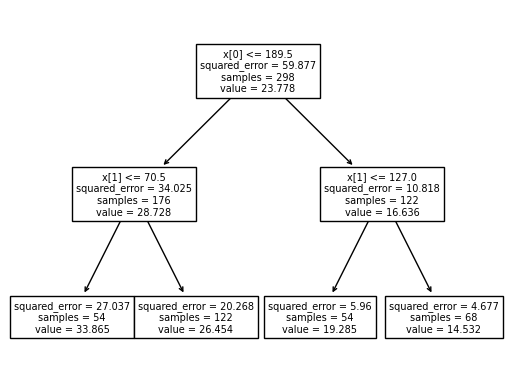

In [31]:
plot_tree(dtr);

RANDOM FOREST

In [34]:
from sklearn.ensemble import RandomForestRegressor
rfg=RandomForestRegressor()
rfg.fit(x_train,y_train)
y_pred1=rfg.predict(x_test)
y_pred1

array([15.286     , 37.319     , 17.598     , 20.523     , 34.988     ,
       27.125     , 20.815     , 15.03      , 12.455     , 25.191     ,
       33.89      , 19.808     , 36.833     , 13.485     , 19.835     ,
       14.722     , 21.481     , 38.03      , 14.94      , 13.63      ,
       15.904     , 37.537     , 24.401     , 17.064     , 16.507     ,
       21.87      , 33.381     , 37.102     , 11.61      , 26.765     ,
       11.3       , 29.955     , 30.846     , 17.645     , 15.192     ,
       19.675     , 13.125     , 20.706     , 34.27171429, 36.794     ,
       23.034     , 31.16      , 26.264     , 19.66      , 19.474     ,
       23.535     , 19.57      , 31.762     , 19.329     , 23.763     ,
       26.629     , 13.        , 19.344     , 36.848     , 17.112     ,
       15.604     , 30.837     , 25.658     , 16.745     , 34.2       ,
       20.625     , 39.644     , 20.746     , 12.6       , 35.498     ,
       18.196     , 24.233     , 16.555     , 13.555     , 28.08

In [35]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
print("Error:",mean_absolute_percentage_error(y_test,y_pred1))
print("R2_score:",r2_score(y_test,y_pred1))

Error: 0.11716875980628574
R2_score: 0.7497631543808688
